# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

### 2.2.2 Introduction To Notebook<a id='2.2.2_Introduction_To_Notebook'></a>

Notebooks grow organically as we explore our data. If you used paper notebooks, you could discover a mistake and cross out or revise some earlier work. Later work may give you a reason to revisit earlier work and explore it further. The great thing about Jupyter notebooks is that you can edit, add, and move cells around without needing to cross out figures or scrawl in the margin. However, this means you can lose track of your changes easily. If you worked in a regulated environment, the company may have a a policy of always dating entries and clearly crossing out any mistakes, with your initials and the date.

**Best practice here is to commit your changes using a version control system such as Git.** Try to get into the habit of adding and committing your files to the Git repository you're working in after you save them. You're are working in a Git repository, right? If you make a significant change, save the notebook and commit it to Git. In fact, if you're about to make a significant change, it's a good idea to commit before as well. Then if the change is a mess, you've got the previous version to go back to.

**Another best practice with notebooks is to try to keep them organized with helpful headings and comments.** Not only can a good structure, but associated headings help you keep track of what you've done and your current focus. Anyone reading your notebook will have a much easier time following the flow of work. Remember, that 'anyone' will most likely be you. Be kind to future you!

In this notebook, note how we try to use well structured, helpful headings that frequently are self-explanatory, and we make a brief note after any results to highlight key takeaways. This is an immense help to anyone reading your notebook and it will greatly help you when you come to summarise your findings. **Top tip: jot down key findings in a final summary at the end of the notebook as they arise. You can tidy this up later.** This is a great way to ensure important results don't get lost in the middle of your notebooks.

In this, and subsequent notebooks, there are coding tasks marked with `#Code task n#` with code to complete. The `___` will guide you to where you need to insert code.

## 2.3 Imports<a id='2.3_Imports'></a>

Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. By all means import something 'in situ' later on when you're experimenting, but if the imported dependency ends up being kept, you should subsequently move the import statement here with the rest.

In [1]:
#Import pandas, matplotlipython3 -m pip install --upgrade "mxnet<2.0.0".pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# Keeping the default settings and only changing the width of the current notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Load The Ski Resort Data

In [4]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('C:\\Users\\Admin/ski_resort_data.csv')

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [6]:
ski_data.shape

(330, 27)

In [7]:
#Call the head method on ski_data to print the first several rows of the data
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [8]:
#Filter the ski_data dataframe to display just the row for our resort with the name 'Big Mountain Resort'
#Hint: you will find that the transpose of the row will give a nicer output. DataFrame's do have a
#transpose method, but you can access this conveniently with the `T` property.
ski_data[ski_data.Name == 'Big Mountain Resort'].transpose()

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [9]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


In [10]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [11]:
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [12]:
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain       2
Brandywine             1
Blue Hills Ski Area    1
Pats Peak              1
Telluride              1
Name: Name, dtype: int64

In [13]:
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Hidden Valley Ski Area, Missouri    1
Bradford Ski Area, Massachusetts    1
Jiminy Peak, Massachusetts          1
Cascade Mountain, Wisconsin         1
Bryce Resort, Virginia              1
dtype: int64

In [14]:
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Hidden Valley Ski Area, Missouri    1
Pico Mountain, Vermont              1
Diamond Peak, Nevada                1
Hunter Mountain, New York           1
Meadowlark Ski Lodge, Wyoming       1
dtype: int64

In [15]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [16]:
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [17]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
West Virginia           4
Virginia                4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
New Jersey              2
Nevada                  2
Indiana                 2
Arizona                 2
South Dakota            2
Missouri                2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

In [18]:
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [19]:
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

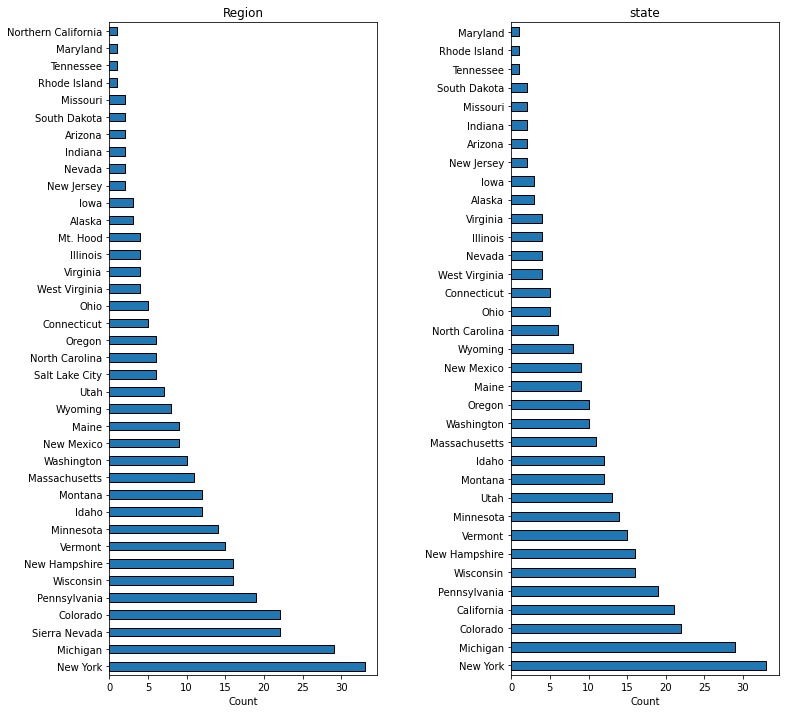

In [20]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0], edgecolor='black')
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1], edgecolor='black')
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

In [21]:
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


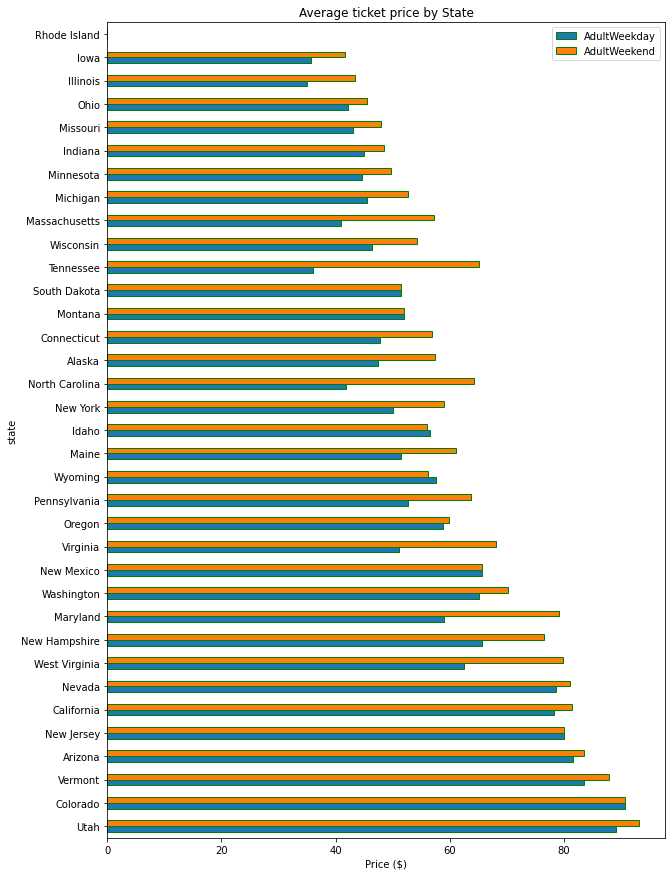

In [22]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 15), title='Average ticket price by State', edgecolor='green'))
plt.xlabel('Price ($)');

In [23]:
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

In [24]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


In [25]:
ticket_prices[ticket_prices['state'] == 'Montana']

,state,Ticket,Price
140,Montana,AdultWeekday,NaN
141,Montana,AdultWeekday,42.0
142,Montana,AdultWeekday,63.0
143,Montana,AdultWeekday,49.0
144,Montana,AdultWeekday,48.0
145,Montana,AdultWeekday,46.0
146,Montana,AdultWeekday,39.0
147,Montana,AdultWeekday,50.0
148,Montana,AdultWeekday,67.0
149,Montana,AdultWeekday,47.0


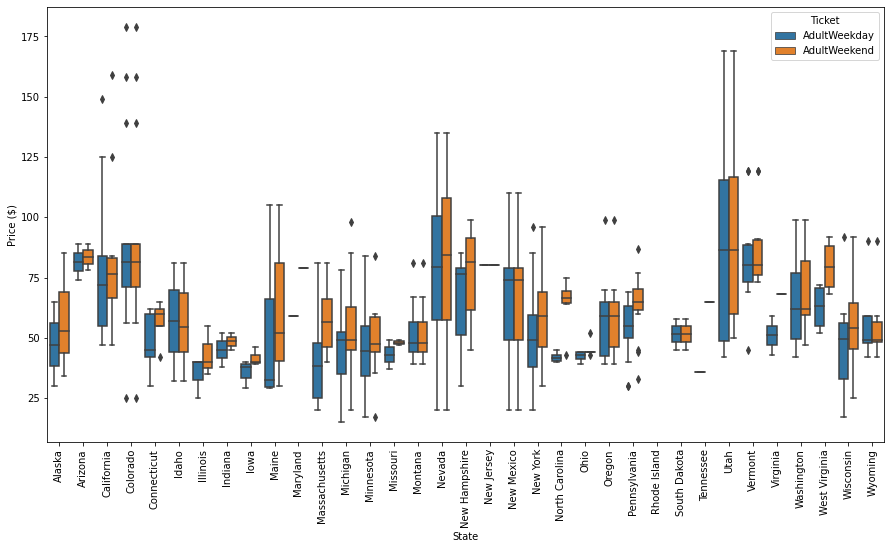

In [26]:
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(15, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [27]:
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [28]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

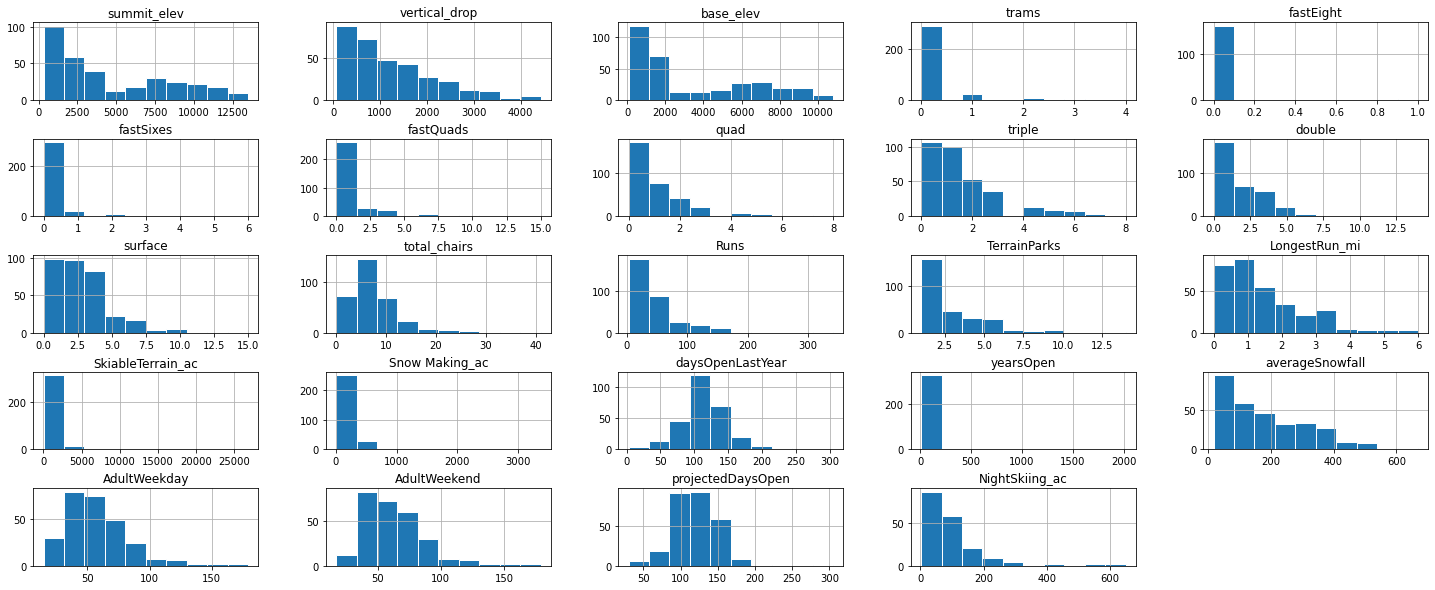

In [29]:
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(25,10), edgecolor='white')
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

In [30]:
# Run below to understand the abnormality at Column 'yearsOpen'=2019 --> Not logical :)
ski_data['yearsOpen'].sort_values(ascending=False).head(30)

115    2019.0
34      104.0
16       95.0
249      87.0
284      86.0
287      85.0
5        84.0
157      84.0
56       84.0
200      83.0
263      83.0
63       83.0
75       83.0
85       83.0
23       83.0
107      83.0
274      83.0
146      83.0
149      83.0
233      82.0
36       82.0
313      82.0
235      82.0
282      82.0
299      82.0
300      82.0
10       82.0
160      82.0
22       82.0
102      82.0
Name: yearsOpen, dtype: float64

In [31]:
list(ski_data['fastEight'])

[0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 1.0,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan

In [32]:
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.loc[ski_data.SkiableTerrain_ac > 10000]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


In [33]:
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data.SkiableTerrain_ac > 10000].transpose()

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


In [34]:
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [35]:
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [36]:
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

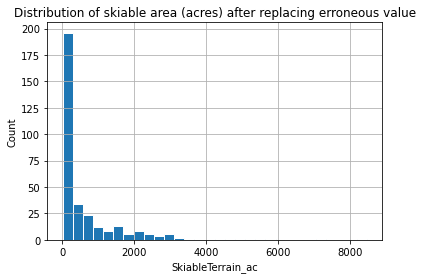

In [37]:
ski_data.SkiableTerrain_ac.hist(bins=30, edgecolor='white')
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [38]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [39]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


In [40]:
 #rough guess for the area covered by snowmaking?

In [41]:
.6 * 4800

2880.0

In [42]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [43]:
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns='fastEight', inplace=True)

In [44]:
#Filter the 'yearsOpen' column for values greater than 100
ski_data.loc[ski_data.yearsOpen > 100]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
34,Howelsen Hill,Colorado,Colorado,7136,440,6696,0,0,0,0,...,6.0,50.0,25.0,100.0,104.0,150.0,25.0,25.0,100.0,10.0
115,Pine Knob Ski Resort,Michigan,Michigan,1308,300,1009,0,0,0,0,...,1.0,80.0,80.0,NaN,2019.0,NaN,49.0,57.0,NaN,NaN


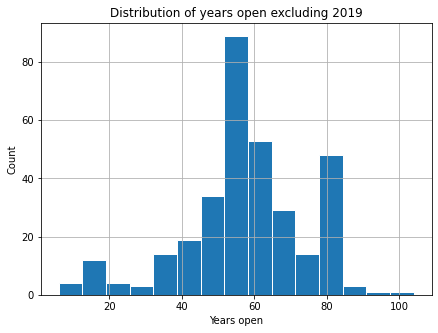

In [45]:
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.loc[ski_data.yearsOpen < 1000].hist('yearsOpen', bins=15, figsize=(7,5), edgecolor='white')
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

In [46]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [47]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

In [48]:
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [49]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

In [50]:
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

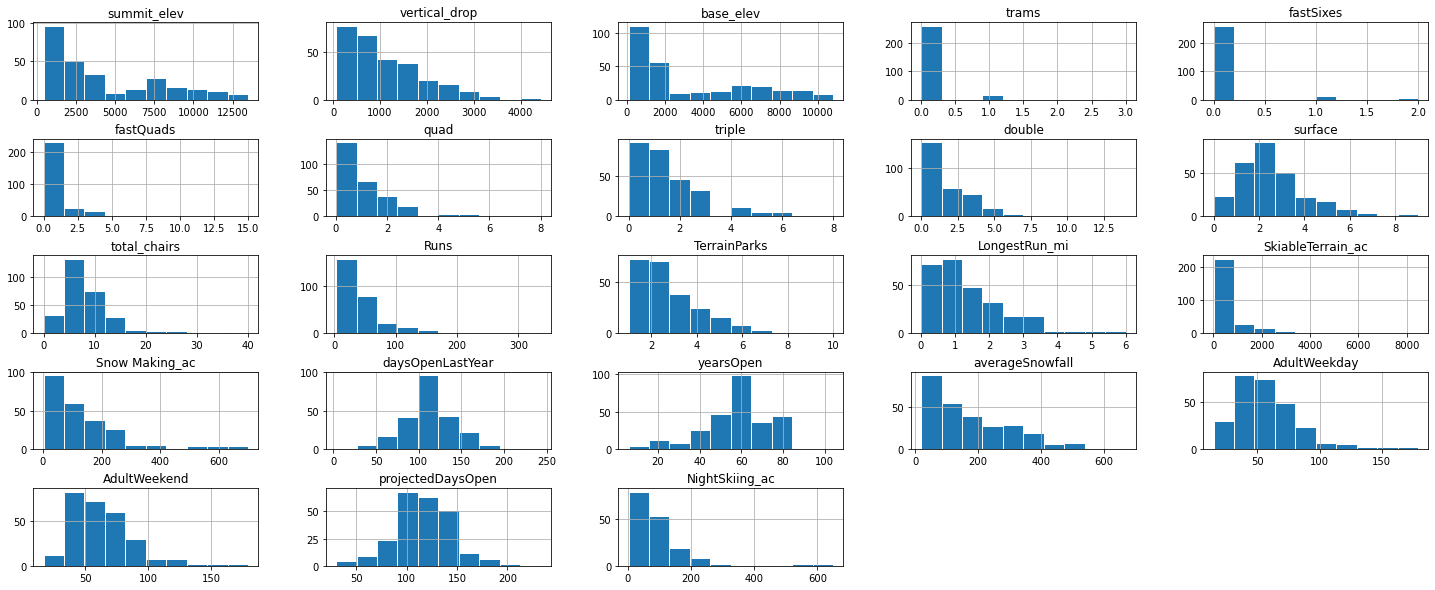

In [51]:
ski_data.hist(figsize=(25, 10), edgecolor='white')
plt.subplots_adjust(hspace=0.5);

In [52]:
#Use pandas' `read_html` method to read the table from the URL below
#states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states' - There's a bug in this URL (car manufacturer names shouldn't be part of that list):
#states_url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States' 
states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states'
usa_states = pd.read_html(states_url)

In [53]:
type(usa_states)

list

In [54]:
len(usa_states)

1

In [55]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                          Unnamed: 2_level_0  \
  Name &postal abbs. [1] Name &postal abbs. [1].1 Unnamed: 2_level_1   
0                Alabama                      NaN                 AL   
1                 Alaska                      NaN                 AK   
2                Arizona                      NaN                 AZ   
3               Arkansas                      NaN                 AR   
4             California                      NaN                 CA   

        Cities                            Established[A] Population[B][3]  \
       Capital Largest (by population)[5] Established[A] Population[B][3]   
0   Montgomery                 Birmingham   Dec 14, 1819          4903185   
1       Juneau                  Anchorage    Jan 3, 1959           731545   
2      Phoenix                    Phoenix   Feb 14, 1912          7278717   
3  Little Rock                Little Rock   Jun 15, 1836          3017804   
4   Sacramento                Los Angeles    Sep 9, 1850         39512223   

  Total area[4]          Land area[4]          Water area[4]          \
            mi2      km2          mi2      km2           mi2     km2   
0         52420   135767        50645   131171          1775    4597   
1        665384  1723337       570641  1477953         94743  245384   
2        113990   295234       113594   294207           396    1026   
3         53179   137732        52035   134771          1143    2961   
4        163695   423967       155779   403466          7916   20501   

  Numberof Reps.  
  Numberof Reps.  
0              7  
1              1  
2              9  
3              4  
4             53

In [56]:
# This is good to split str if needed :)
#usa_states.iloc[:, 0].str.split(" ", n = 3, expand = True)

In [57]:
population1 = usa_states.iloc[:,6]

In [58]:
population1

0      4903185
1       731545
2      7278717
3      3017804
4     39512223
5      5758736
6      3565278
7       973764
8     21477737
9     10617423
10     1415872
11     1787065
12    12671821
13     6732219
14     3155070
15     2913314
16     4467673
17     4648794
18     1344212
19     6045680
20     6892503
21     9986857
22     5639632
23     2976149
24     6137428
25     1068778
26     1934408
27     3080156
28     1359711
29     8882190
30     2096829
31    19453561
32    10488084
33      762062
34    11689100
35     3956971
36     4217737
37    12801989
38     1059361
39     5148714
40      884659
41     6829174
42    28995881
43     3205958
44      623989
45     8535519
46     7614893
47     1792147
48     5822434
49      578759
Name: (Population[B][3], Population[B][3]), dtype: int64

In [59]:
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [60]:
established

0         Birmingham
1          Anchorage
2            Phoenix
3        Little Rock
4        Los Angeles
5             Denver
6         Bridgeport
7         Wilmington
8       Jacksonville
9            Atlanta
10          Honolulu
11             Boise
12           Chicago
13      Indianapolis
14        Des Moines
15           Wichita
16        Louisville
17       New Orleans
18          Portland
19         Baltimore
20            Boston
21           Detroit
22       Minneapolis
23           Jackson
24       Kansas City
25          Billings
26             Omaha
27         Las Vegas
28        Manchester
29            Newark
30       Albuquerque
31          New York
32         Charlotte
33             Fargo
34          Columbus
35     Oklahoma City
36          Portland
37      Philadelphia
38        Providence
39        Charleston
40       Sioux Falls
41         Nashville
42           Houston
43    Salt Lake City
44        Burlington
45    Virginia Beach
46           Seattle
47        Cha

In [61]:
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0, 6, 7]]
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [62]:
usa_states.head()

Name &postal abbs. [1]                          Unnamed: 2_level_0  \
  Name &postal abbs. [1] Name &postal abbs. [1].1 Unnamed: 2_level_1   
0                Alabama                      NaN                 AL   
1                 Alaska                      NaN                 AK   
2                Arizona                      NaN                 AZ   
3               Arkansas                      NaN                 AR   
4             California                      NaN                 CA   

        Cities                            Established[A] Population[B][3]  \
       Capital Largest (by population)[5] Established[A] Population[B][3]   
0   Montgomery                 Birmingham   Dec 14, 1819          4903185   
1       Juneau                  Anchorage    Jan 3, 1959           731545   
2      Phoenix                    Phoenix   Feb 14, 1912          7278717   
3  Little Rock                Little Rock   Jun 15, 1836          3017804   
4   Sacramento                Los Angeles    Sep 9, 1850         39512223   

  Total area[4]          Land area[4]          Water area[4]          \
            mi2      km2          mi2      km2           mi2     km2   
0         52420   135767        50645   131171          1775    4597   
1        665384  1723337       570641  1477953         94743  245384   
2        113990   295234       113594   294207           396    1026   
3         53179   137732        52035   134771          1143    2961   
4        163695   423967       155779   403466          7916   20501   

  Numberof Reps.  
  Numberof Reps.  
0              7  
1              1  
2              9  
3              4  
4             53

In [63]:
usa_states_sub

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695
5,Colorado,5758736,104094
6,Connecticut,3565278,5543
7,Delaware,973764,2489
8,Florida,21477737,65758
9,Georgia,10617423,59425


In [64]:
state_summary

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0
5,Idaho,12,16396.0,1136.0,27.0,415.0
6,Illinois,4,191.0,221.0,6.0,191.0
7,Indiana,2,165.0,157.0,4.0,165.0
8,Iowa,3,140.0,100.0,5.0,140.0
9,Maine,9,3216.0,865.0,17.0,388.0


In [65]:
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2

missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Virginia'}

In [66]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38        Rhode Island
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

In [67]:
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [68]:
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

In [69]:
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Text(0.5, 1.0, 'Weekends vs Weekdays Price')

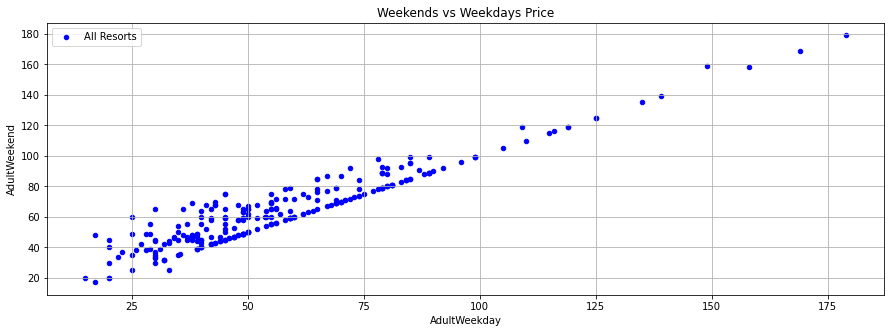

In [70]:
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter', figsize=(15, 5), grid=True, color='Blue', label='All Resorts');
plt.title("Weekends vs Weekdays Price")

In [71]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [72]:
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekday', 'AdultWeekday']]

,AdultWeekday,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [73]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [74]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [75]:
ski_data.shape

(277, 25)

In [76]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [77]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [78]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [79]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [80]:
ski_data.shape

(277, 25)

In [81]:
pwd


'C:\\Users\\Admin'

In [82]:
# save the data to a new csv file
#datapath = 'path/data'
ski_data.to_csv('ski_data_cleaned_v1.csv', index = False)

In [83]:
# save the state_summary separately.
#datapath = 'path/data'
state_summary.to_csv('state_summary_v1.csv', index = False)

In [84]:
#A: The highlights and the key findings from this notebook:
#ski_resort_data.csv was imported with below information:

#330 Rows (RangeIndex) & 27 Columns.
#DataTypes: object (3 Columns), int64 (11 Columns) and float64 (13 Columns).
#"Big Mountain Resort" (Our own resort) is present in the original data index=151 and there's no missing values.
#Main issues found in "ski_resort_data.csv":

#Missing values (NULL) in 13/27 Columns including the most important columns "AdultWeekday" & "AdultWeekend" with NULL%: 16.36% and 15.45% respectivily.
#Duplicate Resorts (same resort name found in multiple states)
#Discripancies found between Regions and States
#Ticket Price Remarks:

#In Montana where our resort is located, we found that Avg Ticket Price is the same during Weekends and Weekdays and are relatively cheap compared to California, Utah and Nevada Resorts.
#Some states have different price variations between Weekends and Weekdays and most of them Weekends_Price > Weekdays_Price.
#Also Some states have different price spreads and averages.
#Missing, abnormal and suspicious Values:

#When it comes to the original data we have, our focus should be mainly in price columns "AdultWeekend" & "AdultWeekday".
#Found that more than 82% of the resorts have no missing values.
#Regarding "AdultWeekend" & "AdultWeekday": found that 3%of the resorts with missing values in one column and 14% with 2 Columns.
#This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have
#Column 'yearsOpen' found a value at 2019, this abnormal thats why this row will be also dropped.
#Column 'fastEight' was also dropped because it was found that 50.3% of resorts values are missing and remainings are Zeros (No value to keep it).
#Column 'SkiableTerrain' found one resort 'Silverton Mountain' with very high skiable area = 26819 --> This sort of error could have occured in transmission or some editing or transcription stage. this value was corrected from 26819 to 1819.
#The final data (ski_data_cleaned.csv) has 277 Rows (Originally 330 Rows).

#One of the pricing Strategy we can find from the original data is that most of the resorts are having sort of DYNAMIC pricing meaning that they have higher ticket prices during the weekends where they have higher number of visitors (Most probably) and lower ticket prices during the weekdays where they have lower number of visitors (To attract more visitors) as shown below:

